<a href="https://colab.research.google.com/github/harika373/harika767299/blob/main/labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install openml scikit-learn pandas matplotlib seaborn --quiet

In [5]:
import openml
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
dataset = openml.datasets.get_dataset(21)  # Car dataset has OpenML ID 21
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)


In [7]:
print("Dataset shape:", X.shape)
print("Sample data:\n", X.head())
print("Target classes:", y.unique())



Dataset shape: (1728, 6)
Sample data:
   buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
Target classes: ['unacc', 'acc', 'vgood', 'good']
Categories (4, object): ['acc', 'good', 'unacc', 'vgood']


In [8]:
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features, drop_first to avoid redundancy
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)


In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)
print("\nBaseline Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Baseline Model Performance
Accuracy: 89.40%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       118
           1       0.54      0.68      0.60        19
           2       0.94      0.97      0.96       358
           3       0.73      0.79      0.76        24

    accuracy                           0.89       519
   macro avg       0.77      0.79      0.77       519
weighted avg       0.90      0.89      0.89       519

Confusion Matrix:
 [[ 83   8  20   7]
 [  4  13   2   0]
 [  9   0 349   0]
 [  2   3   0  19]]


In [13]:
param_grid = {
      'criterion': ['gini', 'entropy'],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 10, 20],
      'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [14]:
best_clf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)



Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
y_pred_best = best_clf.predict(X_test)
print("\nOptimized Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Optimized Model Performance
Accuracy: 90.56%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       118
           1       0.65      0.79      0.71        19
           2       0.96      0.97      0.97       358
           3       0.71      0.62      0.67        24

    accuracy                           0.91       519
   macro avg       0.79      0.79      0.79       519
weighted avg       0.91      0.91      0.90       519

Confusion Matrix:
 [[ 92   8  12   6]
 [  2  15   2   0]
 [ 10   0 348   0]
 [  9   0   0  15]]


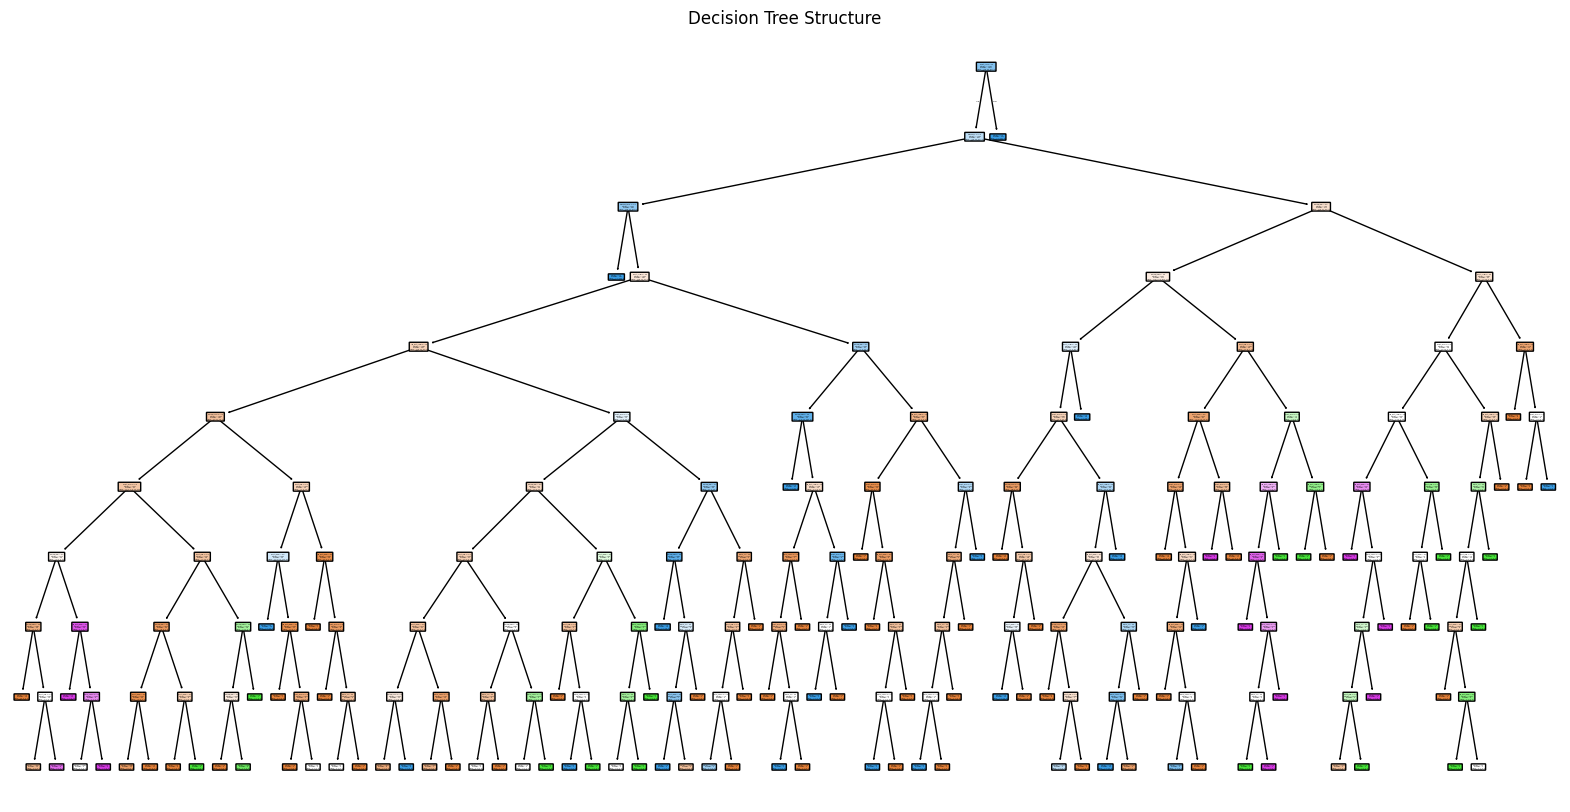

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X_encoded.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


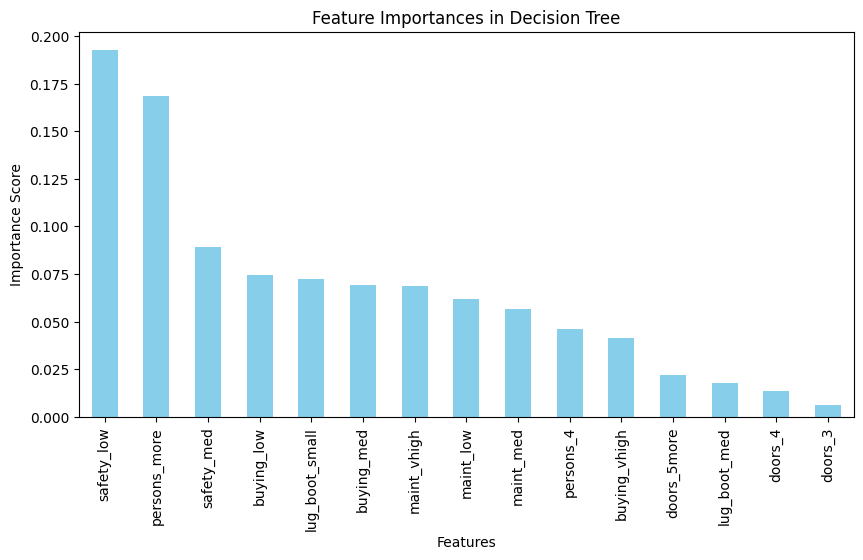

In [17]:
feature_importances = pd.Series(best_clf.feature_importances_, index=X_encoded.columns)
feature_importances = feature_importances[feature_importances > 0]  # Filter out zero importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Feature Importances in Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()



In [18]:
print("\nThe optimized Decision Tree model achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred_best) * 100))
print("Most important features:\n", feature_importances.head())



The optimized Decision Tree model achieved an accuracy of 90.56% on the test set.
Most important features:
 buying_low      0.074281
buying_med      0.069456
buying_vhigh    0.041304
maint_low       0.061697
maint_med       0.056581
dtype: float64
